In [ ]:
# Importar nossos Frameworks

# Lib para modealgem de dados
import pandas as pd

# Lib para analises gráficas
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Lib para ignorar avisos
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Ler os dados
Base_Dados = pd.read_excel('Vase_004 - Magalu - Sem Resolução.xlsx')

# Verificando
Base_Dados.head()

,Data,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
0,2021-01-04,25.580000,24.870001,25.260000,25.200001,25706100,25.181740
1,2021-01-05,25.180000,24.340000,25.100000,24.760000,25431900,24.742058
2,2021-01-06,24.660000,23.420000,24.650000,23.459999,51799000,23.442999
3,2021-01-07,23.850000,22.950001,23.639999,23.160000,42146600,23.143217
4,2021-01-08,24.299999,23.020000,23.190001,23.840000,43988100,23.822723


In [ ]:
# Dimensão da base
Base_Dados.shape

(247, 7)

In [ ]:
# Tipos da informação
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Data        247 non-null    datetime64[ns]
 1   Maior       247 non-null    float64       
 2   Menor       247 non-null    float64       
 3   Abertura    247 non-null    float64       
 4   Fechamento  247 non-null    float64       
 5   Volume      247 non-null    int64         
 6   Adj Close   247 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.6 KB


In [ ]:
# Verificar algumas estatisticas
Base_Dados.describe()

,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
count,247.000000,247.000000,247.000000,247.000000,2.470000e+02,247.000000
mean,18.977530,18.205668,18.629717,18.549555,4.536056e+07,18.541389
std,5.632712,5.567061,5.602659,5.637050,4.082594e+07,5.631316
min,6.200000,5.620000,5.710000,5.740000,8.716100e+06,5.740000
25%,15.010000,14.275000,14.705000,14.555000,2.285200e+07,14.555000
50%,20.650000,19.930000,20.280001,20.270000,3.130900e+07,20.255312
75%,22.595000,21.985001,22.375000,22.200001,4.742785e+07,22.183912
max,27.070000,25.900000,26.250000,26.240000,2.578313e+08,26.220984


In [ ]:
# Ajustando o indice
Dados = Base_Dados.set_index('Data')

# Verificar
Dados.head()

,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
Data,,,,,,
2021-01-04,25.580000,24.870001,25.260000,25.200001,25706100,25.181740
2021-01-05,25.180000,24.340000,25.100000,24.760000,25431900,24.742058
2021-01-06,24.660000,23.420000,24.650000,23.459999,51799000,23.442999
2021-01-07,23.850000,22.950001,23.639999,23.160000,42146600,23.143217
2021-01-08,24.299999,23.020000,23.190001,23.840000,43988100,23.822723


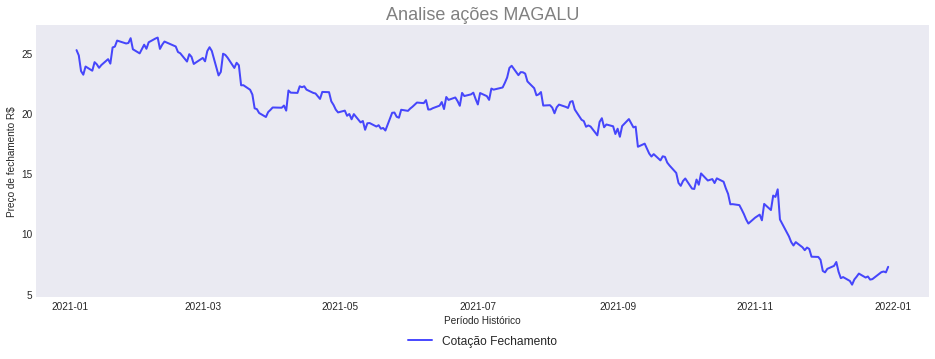

In [ ]:
# 1º Grafico

# Estilo
plt.style.use('seaborn-dark')

# Tamanho
plt.figure( figsize=(16, 5))

# Plot dos dados
plt.plot( Dados.index, Dados['Fechamento'], color='blue', linewidth=2, alpha=0.7 )

# Posição da Legenda
plt.legend( ['Cotação Fechamento'], ncol=2, fontsize=12, loc='upper center',
           bbox_to_anchor=(0.5, -0.1), shadow=True )

# inclusão dos Labels
plt.xlabel('Período Histórico')
plt.ylabel('Preço de fechamento R$')

# Inclusição do Titulo
plt.title('Analise ações MAGALU', loc='center', fontsize=18, color='gray');

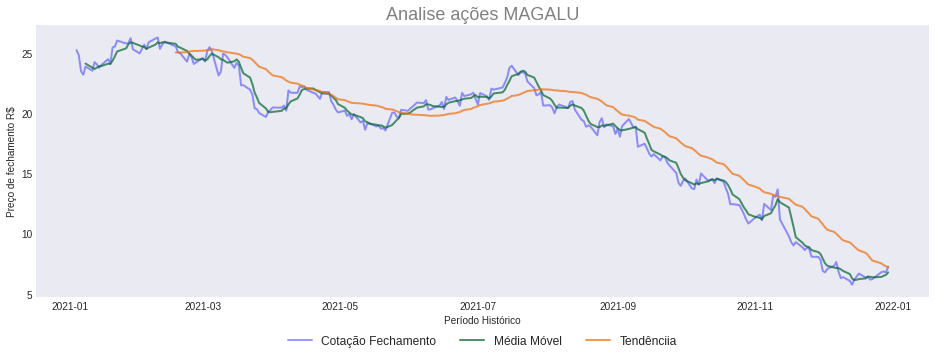

In [ ]:
# 2º Grafico

# Gerando as médias
Media_Movel = Dados['Fechamento'].rolling(5).mean()
Media_Tendencia = Dados['Fechamento'].rolling(30).mean()

# Estilo
plt.style.use('seaborn-dark')

# Tamanho
plt.figure( figsize=(16, 5))

# Plot dos dados
plt.plot( Dados.index, Dados['Fechamento'], color='blue', linewidth=2, alpha=0.4 )
plt.plot( Dados.index, Media_Movel, color='#00652e', linewidth=2, alpha=0.7 )
plt.plot( Dados.index, Media_Tendencia, color='#ed6e0c', linewidth=2, alpha=0.7 )

# Posição da Legenda
plt.legend( ['Cotação Fechamento', 'Média Móvel', 'Tendênciia'], ncol=3, fontsize=12, loc='upper center',
           bbox_to_anchor=(0.5, -0.1), shadow=True )

# inclusão dos Labels
plt.xlabel('Período Histórico')
plt.ylabel('Preço de fechamento R$')

# Inclusição do Titulo
plt.title('Analise ações MAGALU', loc='center', fontsize=18, color='gray');

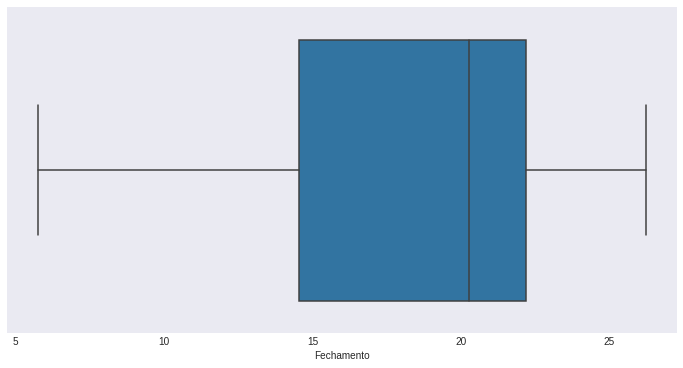

In [ ]:
# Boxplot
plt.figure( figsize=(12,6) )
sns.boxplot( data=Dados, x='Fechamento');

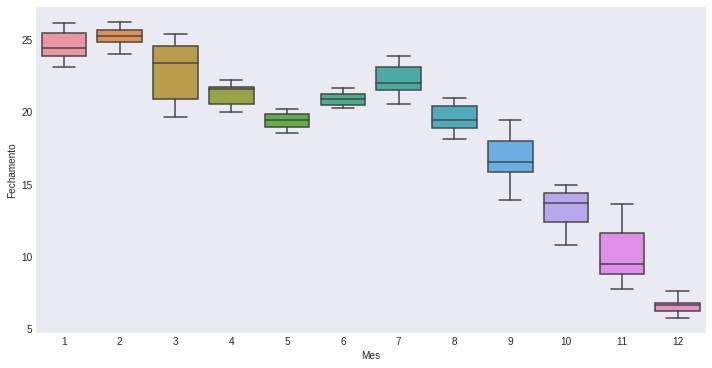

In [ ]:
# Boxplot Mensal

Base_Dados['Mes'] = Base_Dados['Data'].dt.month

plt.figure( figsize=(12,6) )

sns.boxplot( data=Base_Dados, x='Mes', y='Fechamento');

In [ ]:
# Analise da Tabela
Base_Dados.groupby(['Mes']).describe()['Fechamento']

,count,mean,std,min,25%,50%,75%,max
Mes,,,,,,,,
1,19.0,24.644737,0.960280,23.160000,23.900000,24.450001,25.455000,26.190001
2,18.0,25.208889,0.656021,24.049999,24.877501,25.299999,25.650000,26.240000
3,23.0,22.855217,1.976698,19.650000,20.940001,23.389999,24.559999,25.440001
4,20.0,21.249000,0.735297,20.030001,20.560000,21.625000,21.760000,22.200001
5,21.0,19.430476,0.564973,18.530001,18.969999,19.459999,19.900000,20.250000
6,21.0,20.898095,0.463116,20.270000,20.500000,20.889999,21.270000,21.670000
7,21.0,22.232857,0.977574,20.600000,21.530001,22.040001,23.120001,23.900000
8,22.0,19.656818,0.885827,18.129999,18.897500,19.485000,20.452499,20.969999
9,21.0,16.746191,1.628581,13.940000,15.870000,16.570000,18.010000,19.480000


In [ ]:
# Plotly

Grafico = go.Figure(
    data=[
          go.Candlestick(
              x = Dados.index,
              open = Dados['Abertura'],
              high = Dados['Maior'],
              low = Dados['Menor'],
              close = Dados['Fechamento'],
              increasing_line_color = 'yellow',
              decreasing_line_color = 'green'
          )
    ]
)

# Retirando a legenda
Grafico.update_layout( xaxis_rangeslider_visible=False )

# Mostrar
Grafico.show()